(60000, 28, 28)
(60000,)
(60000, 784)


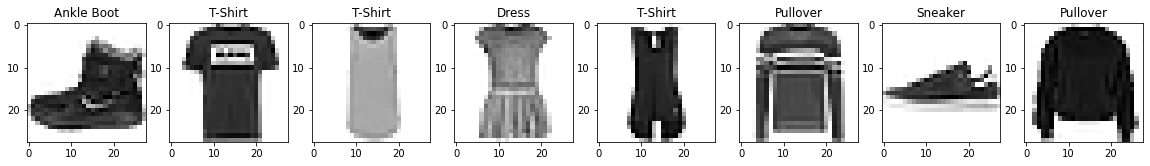

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import numpy as np
import random
import matplotlib.pyplot as plt

# https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/
# https://www.pluralsight.com/guides/use-autoencoders-to-denoise-images

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)
print(x_train.shape)

categories = ['T-Shirt','Pants','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

def plot(x,label):
  imgs = x[:8]
  fig = plt.figure(figsize=[20,5])

  for num, pic in enumerate(imgs):
    plot = fig.add_subplot(1,8,num+1)
    plot.title.set_text(categories[label[num]])
    pic = pic.reshape(28,28)
    plot.imshow(pic, cmap='binary')
    #pic = pic.reshape(1,28,28,1)

  plt.show()
  return

plot(x_train, y_train)

# Add Noise to the Dataset

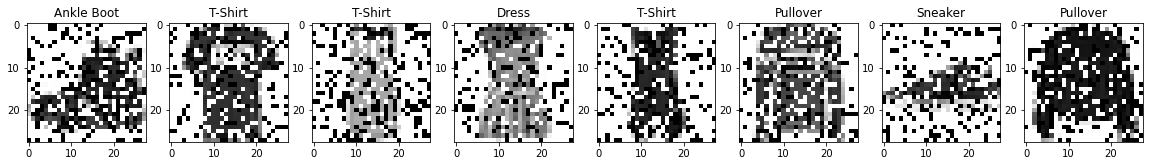

In [ ]:
def noise(img):
  number_of_pixels = random.randint(300, 600)
  for i in range(number_of_pixels):
      
      pixel = random.randint(0, 784 - 1)
       
      # Color that pixel to white
      img[pixel] = 255
        
  number_of_pixels = random.randint(300 , 600)
  for i in range(number_of_pixels):
      
    pixel = random.randint(0, 784 - 1)
       
    # Color that pixel to white
    img[pixel] = 0
  return img


# x_train_noisy = x_train + np.random.rand(len(x_train),784)*0.9
# x_test_noisy = x_test + np.random.rand(len(x_test),784)*0.9

# x_train_noisy = x_train + 0.75 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
# x_test_noisy = x_test + 0.75 * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
 
# x_train_noisy = np.clip(x_train_noisy,0.,1.)
# x_test_noisy = np.clip(x_test_noisy,0.,1.)

x_train_noisy = np.copy(x_train)
x_test_noisy = np.copy(x_test)

x_train_noisy.setflags(write=1)
x_test_noisy.setflags(write=1)

for num, pic in enumerate(x_train_noisy):
  #x_train_noisy[num] = noise(x_train[num])
  number_of_pixels = random.randint(150, 350)
  for i in range(number_of_pixels):
      
      pixel = random.randint(0, 784 - 1)
       
      # Color that pixel to white
      pic[pixel] = 255
        
  number_of_pixels = random.randint(100 , 200)
  for i in range(number_of_pixels):
      
    pixel = random.randint(0, 784 - 1)
       
    # Color that pixel to white
    pic[pixel] = 0

for num, pic in enumerate(x_test_noisy):
  number_of_pixels = random.randint(100, 200)
  for i in range(number_of_pixels):
      
      pixel = random.randint(0, 784 - 1)
       
      # Color that pixel to white
      pic[pixel] = 255
        
  number_of_pixels = random.randint(150 , 350)
  for i in range(number_of_pixels):
      
    pixel = random.randint(0, 784 - 1)
       
    # Color that pixel to white
    pic[pixel] = 0

x_train = x_train.reshape(len(x_train),28,28)
x_test = x_test.reshape(len(x_test),28,28)
x_train_noisy = x_train_noisy.reshape(len(x_train_noisy),28,28)
x_test_noisy = x_test_noisy.reshape(len(x_test_noisy),28,28)

plot(x_train_noisy, y_train)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 32)        0   

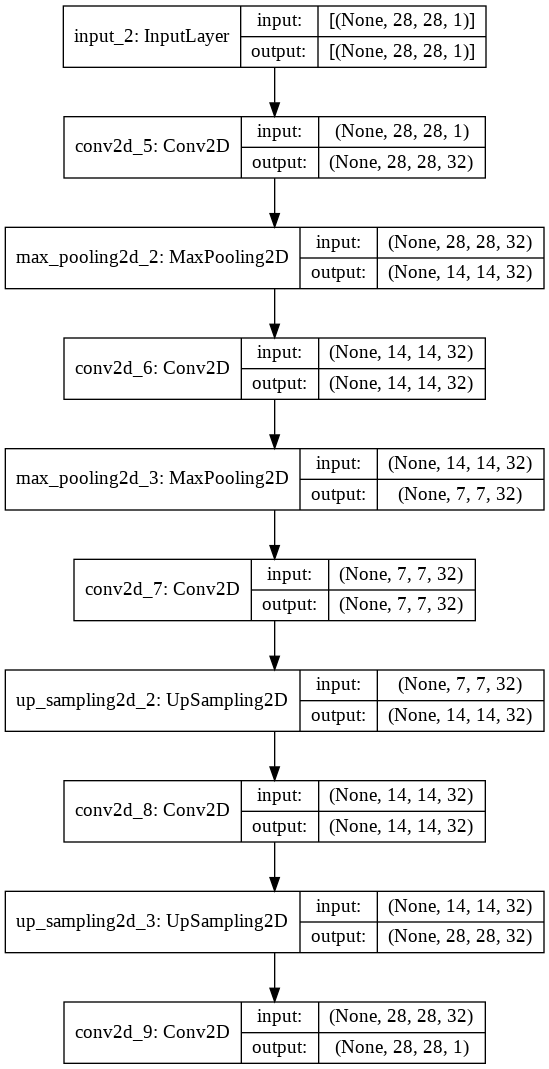

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.utils import plot_model

input = Input(shape=(28,28,1))

encode1 = Conv2D(32, (3,3), activation='relu', padding='same')(input)
encode2 = MaxPooling2D((2,2), padding='same')(encode1)
encode3 = Conv2D(32, (3,3), activation='relu', padding='same')(encode2)
encode4 = MaxPooling2D((2,2), padding='same')(encode3)

decode1 = Conv2D(32, (3,3), activation='relu', padding='same')(encode4)
decode2 = UpSampling2D((2,2))(decode1)
decode3 = Conv2D(32, (3,3), activation='relu', padding='same')(decode2)
decode4 = UpSampling2D((2,2))(decode3)
decode5 = Conv2D(1, (3,3), activation='relu', padding='same')(decode4)

model = Model(input,decode5)
model.summary()

plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='RMSprop', loss='mean_squared_error')
history = model.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

Epoch 1/50
469/469 [==============================] - 36s 7ms/step - loss: 3150.9491
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 1495.4453
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 1337.8132
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 1237.4333
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 1177.0746
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 1127.5990
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 1094.4060
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 1071.6516
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 1047.7269
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 1027.3182
Epoch 11/50
469/469 [==============================] - 3s 6ms/step - loss: 1008.7259
Epoch 12/50
469/469 [==============================] - 3s 6ms/step - loss

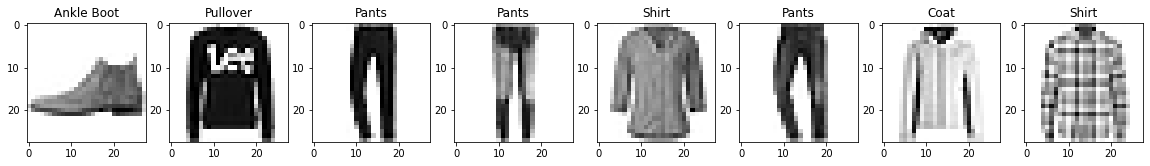

In [ ]:
plot(x_test, y_test)

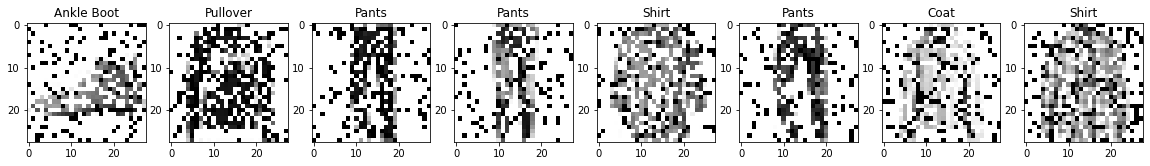

In [ ]:
plot(x_test_noisy,y_test)

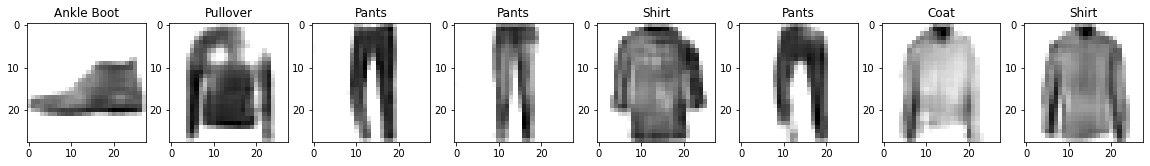

In [ ]:
p = model.predict(x_test_noisy)

plot(p,y_test)